In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Loading the data with pandas
math = pd.read_csv("../Data/math.csv")
read = pd.read_csv("../Data/read.csv")
business = pd.read_csv("../Data/BUSSINES.csv")
geo = pd.read_csv("../Data/geo.csv", low_memory=False)
funding = pd.read_csv("../Data/FUNDING.csv")
income = pd.read_csv("../Data/income.csv")
teachers = pd.read_csv("../Data/Teacher Ratios.csv")
title1 = pd.read_csv("../Data/title1.csv")
#Set indexs
math = math.set_index("math_ncessch")
read = read.set_index("read_ncessch")
business = business.set_index("zip_code")
funding["ncesid"] = pd.to_numeric(funding["ncesid"], errors="coerce")
funding = funding.set_index("ncesid")
geo = geo.set_index("ncessch")
income = income.set_index("zipcode")
teachers["ncessch"] = teachers["ncessch"].astype(np.int64)
teachers = teachers.set_index("ncessch")
title1["ncessch"] = title1["ncessch"].astype(np.int64)
title1 = title1.set_index("ncessch")

In [21]:
print(list(math.columns))

['math_stnam', 'math_fipst', 'math_leaid', 'math_st_leaid', 'math_leanm', 'math_st_schid', 'math_schnam', 'math_all_grades_numvalid', 'math_native_american_all_grades_numvalid', 'math_asian_pacific_islander_all_grades_numvalid', 'math_black_all_grades_numvalid', 'math_hispanic_all_grades_numvalid', 'math_more_than_two_races_all_grades_numvalid', 'math_white_all_grades_numvalid', 'math_f_all_grades_numvalid', 'math_m_all_grades_numvalid', 'math_children_with_disabilites_all_grades_numvalid', 'math_poor_all_grades_numvalid', 'math_limited_english_all_grades_numvalid', 'math_homeless_all_grades_numvalid', 'math_migrant_all_grades_numvalid', 'math_all03numvalid', 'math_all04numvalid', 'math_all05numvalid', 'math_all06numvalid', 'math_all07numvalid', 'math_all08numvalid', 'math_allhsnumvalid', 'math_native_american03numvalid', 'math_native_american04numvalid', 'math_native_american05numvalid', 'math_native_american06numvalid', 'math_native_american07numvalid', 'math_native_american08numvali

In [24]:
combined = math[['math_leaid','math_all_grades_numvalid','math_all_grades_pctprof_low','math_all_grades_pctprof_high']].join([read[['read_all_grades_numvalid','read_all_grades_pctprof_low','read_all_grades_pctprof_high']],geo], how="inner")
combined = combined.join(business[['num_establishments',"num_paid_employees", "first_quarter_payroll", "annual_payroll"]], how="inner", on="zip")
combined = combined.join(funding.drop(["idcensus","name","conum","csa","cbsa","enroll"],1), how="inner", on="math_leaid")
combined = combined.join(income.drop(["statefips",'state'], 1), how="inner", on="zip")
combined = combined.join(teachers["num_full_time"], how="inner")
combined = combined.join(title1[["title_i_status","title_i_eligibility","school_wide_title_i_eligibility","ntnl_school_lunch_program_status"]], how="inner")
combined = combined.drop('math_leaid',1)
combined.describe()

,math_all_grades_numvalid,math_all_grades_pctprof_low,math_all_grades_pctprof_high,read_all_grades_numvalid,read_all_grades_pctprof_low,read_all_grades_pctprof_high,opstfips,zip,stfips,cfips,...,before_credits_amount,num_returns_non_refund_edu,non_refund_edu_amount,num_returns_excess_income_credit,excess_income_credit_amount,number_of_refundable_edu,refundable_edu_amount,number_returns_net_premium_credits,net_premium_credits_amount,num_full_time
count,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,...,8.190100e+04,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000,81901.000000
mean,299.966337,45.723398,48.793739,299.780210,49.362877,52.408078,28.087313,54902.990415,28.087239,28174.923444,...,1.029286e+05,746.235089,777.591092,1920.870563,4762.710724,716.680627,625.063259,174.062466,115.695608,33.554830
std,255.429023,24.927463,25.676905,254.102876,22.878552,23.590236,16.191058,28657.594411,16.190590,16214.101591,...,1.440736e+05,681.386058,706.043427,2060.775991,5561.018574,696.062340,606.538507,212.598716,120.821645,25.155671
min,1.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,1.000000,1001.000000,1.000000,1001.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,133.000000,27.000000,29.000000,133.000000,34.000000,36.000000,13.000000,31061.000000,13.000000,13067.000000,...,1.722100e+04,180.000000,188.000000,410.000000,880.000000,170.000000,145.000000,40.000000,27.000000,18.500000
50%,237.000000,45.000000,49.000000,237.000000,50.000000,54.000000,27.000000,55409.000000,27.000000,27161.000000,...,5.816600e+04,590.000000,615.000000,1270.000000,2829.000000,550.000000,480.000000,120.000000,82.000000,28.600000
75%,380.000000,65.000000,69.000000,380.000000,66.000000,69.000000,42.000000,78852.000000,42.000000,42043.000000,...,1.314770e+05,1120.000000,1171.000000,2720.000000,6584.000000,1050.000000,907.000000,240.000000,166.000000,42.000000
max,3277.000000,99.000000,100.000000,3265.000000,99.000000,100.000000,56.000000,99929.000000,56.000000,56045.000000,...,2.065869e+06,5030.000000,5172.000000,15560.000000,46624.000000,5250.000000,4644.000000,3880.000000,1042.000000,295.380000


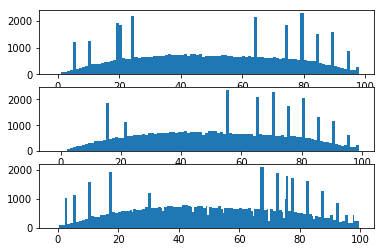

In [123]:
def plotHistogram(col, plot):
    xs = list(set(col))
    xs.sort()
    temp = []
    for i in col:
        if(i >= 0):
            temp.append(i)
    col = temp
    plot.hist(col,bins=xs)
def pruneN(vals,col, n, plot):
    maxs = vals.value_counts(sort=True)
    maxs = maxs.reset_index()
    maxs = maxs.set_index(col)
    maxs.sort_index()
    maxs = maxs.reset_index(drop=True)
    maxs = list(maxs[0:n]['index'])
    ret = []
    for i in vals:
        if not(i in maxs):
            ret.append(i)
    plotHistogram(ret,plot )
math_fig = plt.figure()
math_high = math_fig.add_subplot(311)
math_low = math_fig.add_subplot(312)
math_avg = math_fig.add_subplot(313)
math_avg_math = (math['math_all_grades_pctprof_low']+math['math_all_grades_pctprof_high'])/2
pruneN(math['math_all_grades_pctprof_high'],'math_all_grades_pctprof_high',10, math_high)
pruneN(math['math_all_grades_pctprof_low'],'math_all_grades_pctprof_low',10, math_low)
pruneN(avg_math,0,10,math_avg)

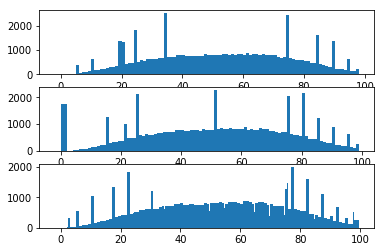

In [124]:
read_fig = plt.figure()
read_high = read_fig.add_subplot(311)
read_low = read_fig.add_subplot(312)
read_avg = read_fig.add_subplot(313)
avg_read = (read['read_all_grades_pctprof_low']+read['read_all_grades_pctprof_high'])/2
pruneN(read['read_all_grades_pctprof_high'],'read_all_grades_pctprof_high',10, read_high)
pruneN(read['read_all_grades_pctprof_low'],'read_all_grades_pctprof_low',10, read_low)
pruneN(avg_read,0,10,read_avg)

In [6]:
math.describe()

,math_fipst,math_leaid,math_ncessch,math_all_grades_numvalid,math_native_american_all_grades_numvalid,math_asian_pacific_islander_all_grades_numvalid,math_black_all_grades_numvalid,math_hispanic_all_grades_numvalid,math_more_than_two_races_all_grades_numvalid,math_white_all_grades_numvalid,...,math_hispanic04pctprof_high,math_hispanic05pctprof_low,math_hispanic05pctprof_high,math_hispanic06pctprof_low,math_hispanic06pctprof_high,math_hispanic07pctprof_low,math_hispanic07pctprof_high,math_hispanic08pctprof_low,math_hispanic08pctprof_high,math_hispanic_all_grades_pctprof_low
count,90796.000000,9.079600e+04,9.079600e+04,90796.000000,44743.000000,65705.000000,75655.000000,84879.000000,69846.000000,86621.000000,...,45157.000000,43781.000000,43781.000000,28942.000000,28942.000000,23705.000000,23705.000000,23848.000000,23848.000000,84266.000000
mean,28.901681,2.901526e+06,2.901526e+11,290.968578,6.399146,22.461030,53.074258,85.065446,12.623171,144.419494,...,44.200390,26.258263,42.959138,23.546299,38.296040,22.567391,36.656486,23.923306,37.926493,31.933793
std,16.808904,1.680254e+06,1.680254e+11,257.418417,22.975219,55.368437,92.031107,138.583779,15.334733,159.966720,...,41.928801,28.013024,42.925269,25.868957,40.478727,25.157262,39.739529,27.511997,41.055384,26.242660
min,1.000000,1.000050e+05,1.000050e+10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,13.000000,1.302512e+06,1.302513e+11,123.000000,1.000000,2.000000,4.000000,8.000000,3.000000,29.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,29.000000,2.910500e+06,2.910500e+11,229.000000,2.000000,6.000000,15.000000,29.000000,8.000000,100.000000,...,39.000000,21.000000,29.000000,20.000000,29.000000,20.000000,24.000000,20.000000,24.000000,30.000000
75%,42.000000,4.218300e+06,4.218300e+11,371.000000,4.000000,19.000000,62.000000,102.000000,16.000000,199.000000,...,100.000000,51.000000,100.000000,50.000000,79.000000,50.000000,74.000000,50.000000,84.000000,51.000000
max,78.000000,7.800030e+06,7.800030e+11,7948.000000,825.000000,1412.000000,2807.000000,2256.000000,401.000000,3925.000000,...,100.000000,95.000000,100.000000,95.000000,100.000000,95.000000,100.000000,99.000000,100.000000,99.000000


In [55]:
math['math_all_grades_pctprof_avg'].describe()

count    90796.000000
mean        46.686346
std         25.561237
min         -2.000000
25%         27.000000
50%         47.000000
75%         67.000000
max         99.500000
Name: math_all_grades_pctprof_avg, dtype: float64